# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Data Preprocessing

In [9]:
data = data.join(pd.get_dummies(data.gender,columns=["gender"])).drop(["gender"],axis=1)

In [16]:
data = data.join(pd.get_dummies(data["race/ethnicity"],columns=["race/ethnicity"])).drop(["race/ethnicity"],axis=1)


In [17]:
data

,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E
0,bachelor's degree,standard,none,72,72,74,True,False,False,True,False,False,False
1,some college,standard,completed,69,90,88,True,False,False,False,True,False,False
2,master's degree,standard,none,90,95,93,True,False,False,True,False,False,False
3,associate's degree,free/reduced,none,47,57,44,False,True,True,False,False,False,False
4,some college,standard,none,76,78,75,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,standard,completed,88,99,95,True,False,False,False,False,False,True
996,high school,free/reduced,none,62,55,55,False,True,False,False,True,False,False
997,high school,free/reduced,completed,59,71,65,True,False,False,False,True,False,False
998,some college,standard,completed,68,78,77,True,False,False,False,False,True,False


In [18]:
pd.get_dummies(data["parental level of education"],columns=["parental level of education"])

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,False,True,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,True,False,False
3,True,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
995,False,False,False,True,False,False
996,False,False,True,False,False,False
997,False,False,True,False,False,False
998,False,False,False,False,True,False


In [19]:
data = data.join(pd.get_dummies(data["parental level of education"],columns=["parental level of education"])).drop(["parental level of education"],axis=1)

In [20]:
data

,lunch,test preparation course,math score,reading score,writing score,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,standard,none,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False
1,standard,completed,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False
2,standard,none,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False
3,free/reduced,none,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False
4,standard,none,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,standard,completed,88,99,95,True,False,False,False,False,False,True,False,False,False,True,False,False
996,free/reduced,none,62,55,55,False,True,False,False,True,False,False,False,False,True,False,False,False
997,free/reduced,completed,59,71,65,True,False,False,False,True,False,False,False,False,True,False,False,False
998,standard,completed,68,78,77,True,False,False,False,False,True,False,False,False,False,False,True,False


In [21]:
data = data.join(pd.get_dummies(data["lunch"],columns=["lunch"])).drop(["lunch"],axis=1)

In [22]:
data = data.join(pd.get_dummies(data["test preparation course"],columns=["test preparation course"])).drop(["test preparation course"],axis=1)

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

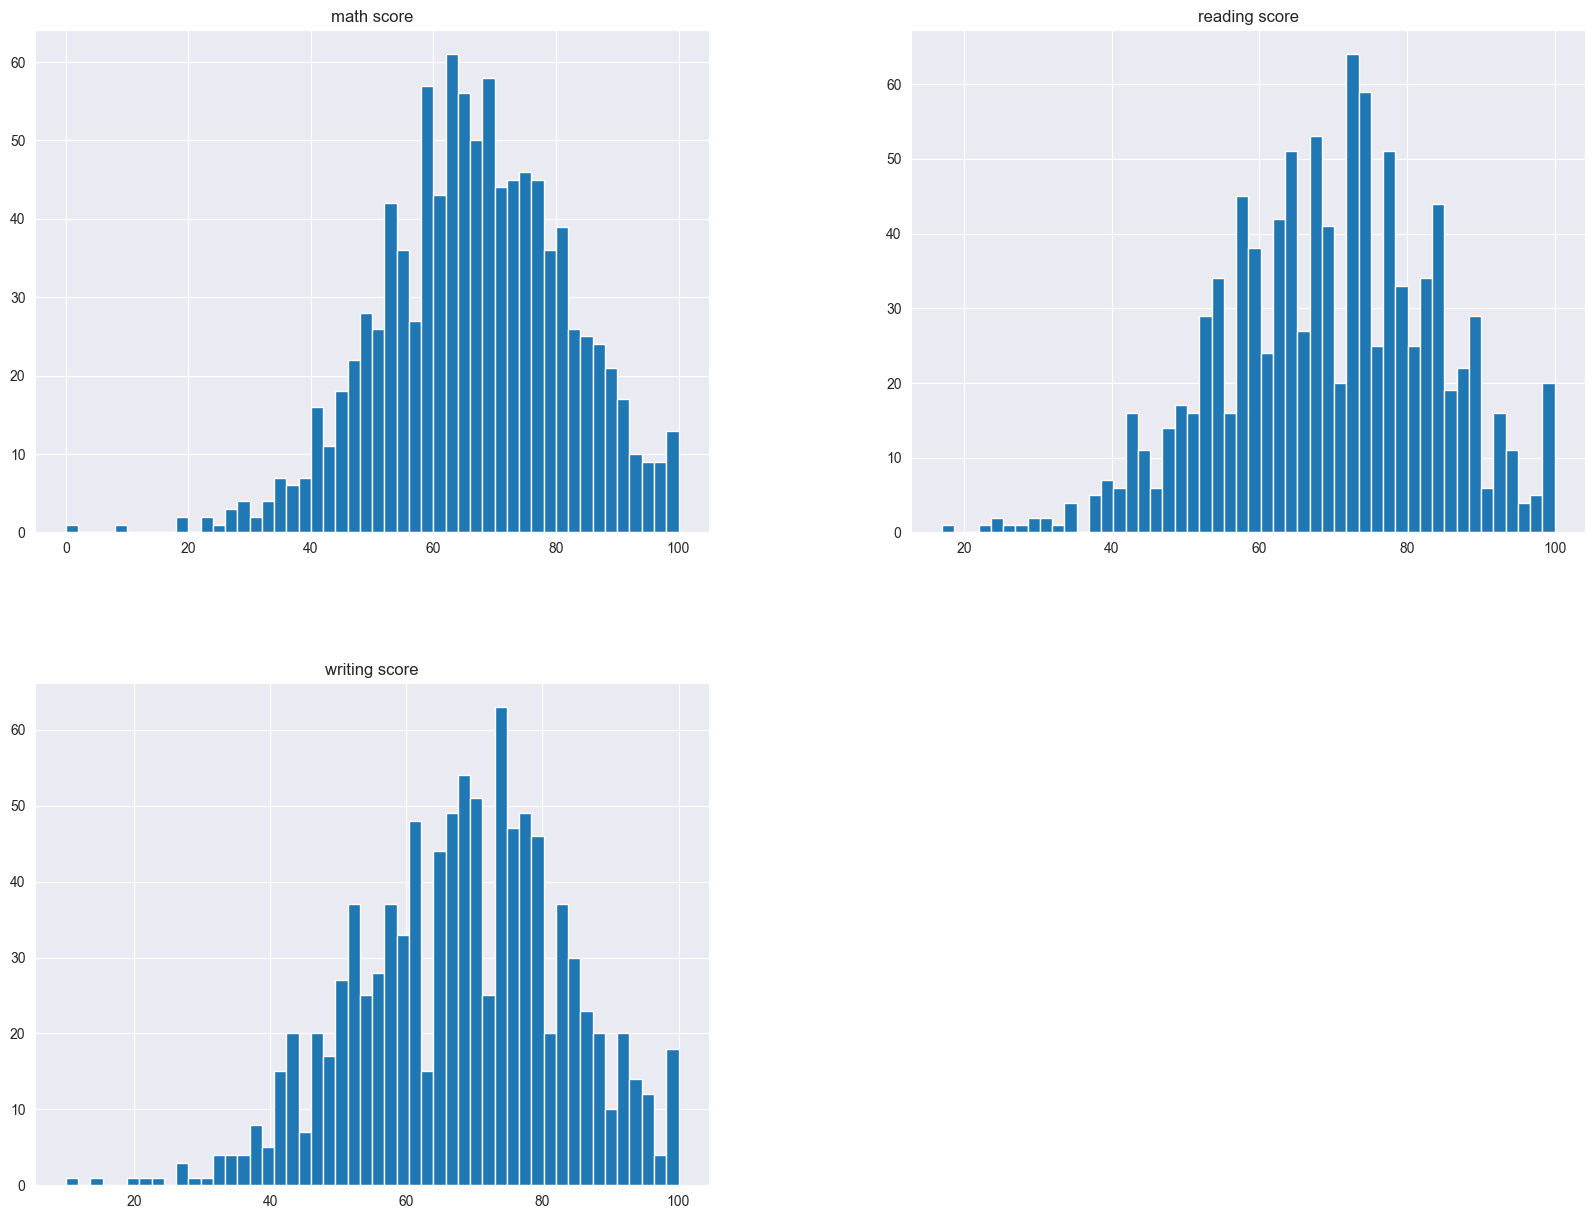

In [24]:
data.hist(bins=50, figsize=(20,15))

In [26]:
x = data.drop(["math score"],axis=1)
y = data["math score"]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
lr_score = lr.score(x_test,y_test)

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
dt_score = dt.score(x_test,y_test)

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
rf_score = rf.score(x_test,y_test)

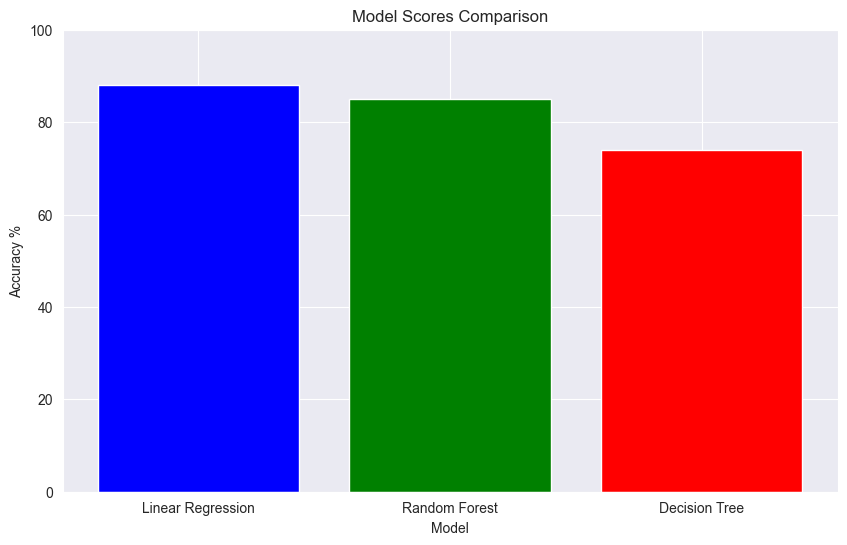

In [60]:
# Scores of the models
model_names = ['Linear Regression','Random Forest','Decision Tree',]
scores = [round(x,2)*100 for x in [lr_score, rf_score,  dt_score,]]
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.title('Model Scores Comparison')
plt.ylim(0, 100)  # Assuming scores are between 0 and 1
plt.show()